In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

In [27]:
# CSVファイルからデータを読み込む with 'utf-8' encoding
df = pd.read_csv(fr'C:\Users\100ca\Documents\PyCode\scraping\data\nikkei225.csv', encoding='utf-8')

# '情報なし'や'---'などのデータをNaNに変換
df.replace({'情報なし': None, '---': None}, inplace=True)

# 数値データの列をfloat型に変換
numerical_cols = ['salary', 'overtime', 'salary_25_29', 'salary_30_34', 'salary_35_39', 'salary_40_44', 'salary_45_49', 'salary_50_54', 'salary_55_59', 'salary_60_up']

# Replace non-numeric values in these columns with NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [28]:
# フォントの設定
plt.rcParams['font.family'] = 'Meiryo'  # 使用するフォント名を指定

In [29]:
# 'salary' 列の欠損値を持つ行を削除し、'salary' の値で降順にソート
df = df.dropna(subset=['salary']).sort_values('salary', ascending=False)

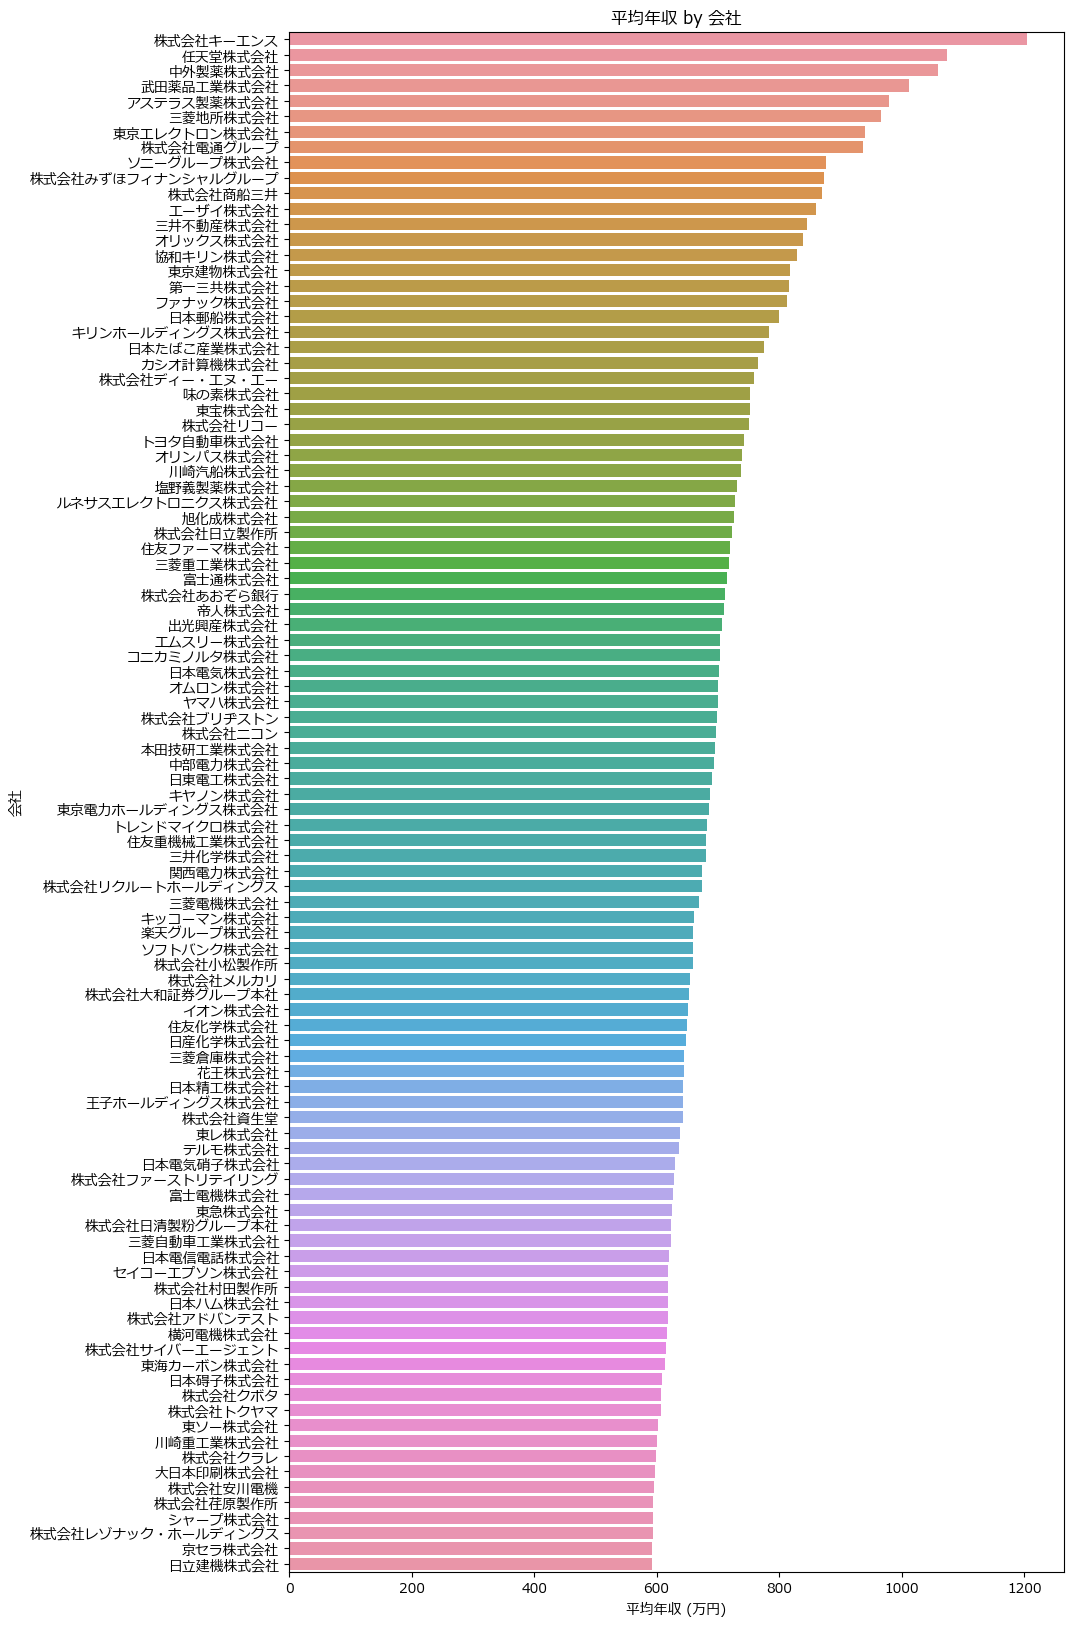

In [30]:
plt.figure(figsize=(10, 20))
sns.barplot(x='salary', y='company', data=df.sort_values('salary', ascending=False).head(100))
plt.title('平均年収 by 会社')
plt.xlabel('平均年収 (万円)')
plt.ylabel('会社')
plt.show()


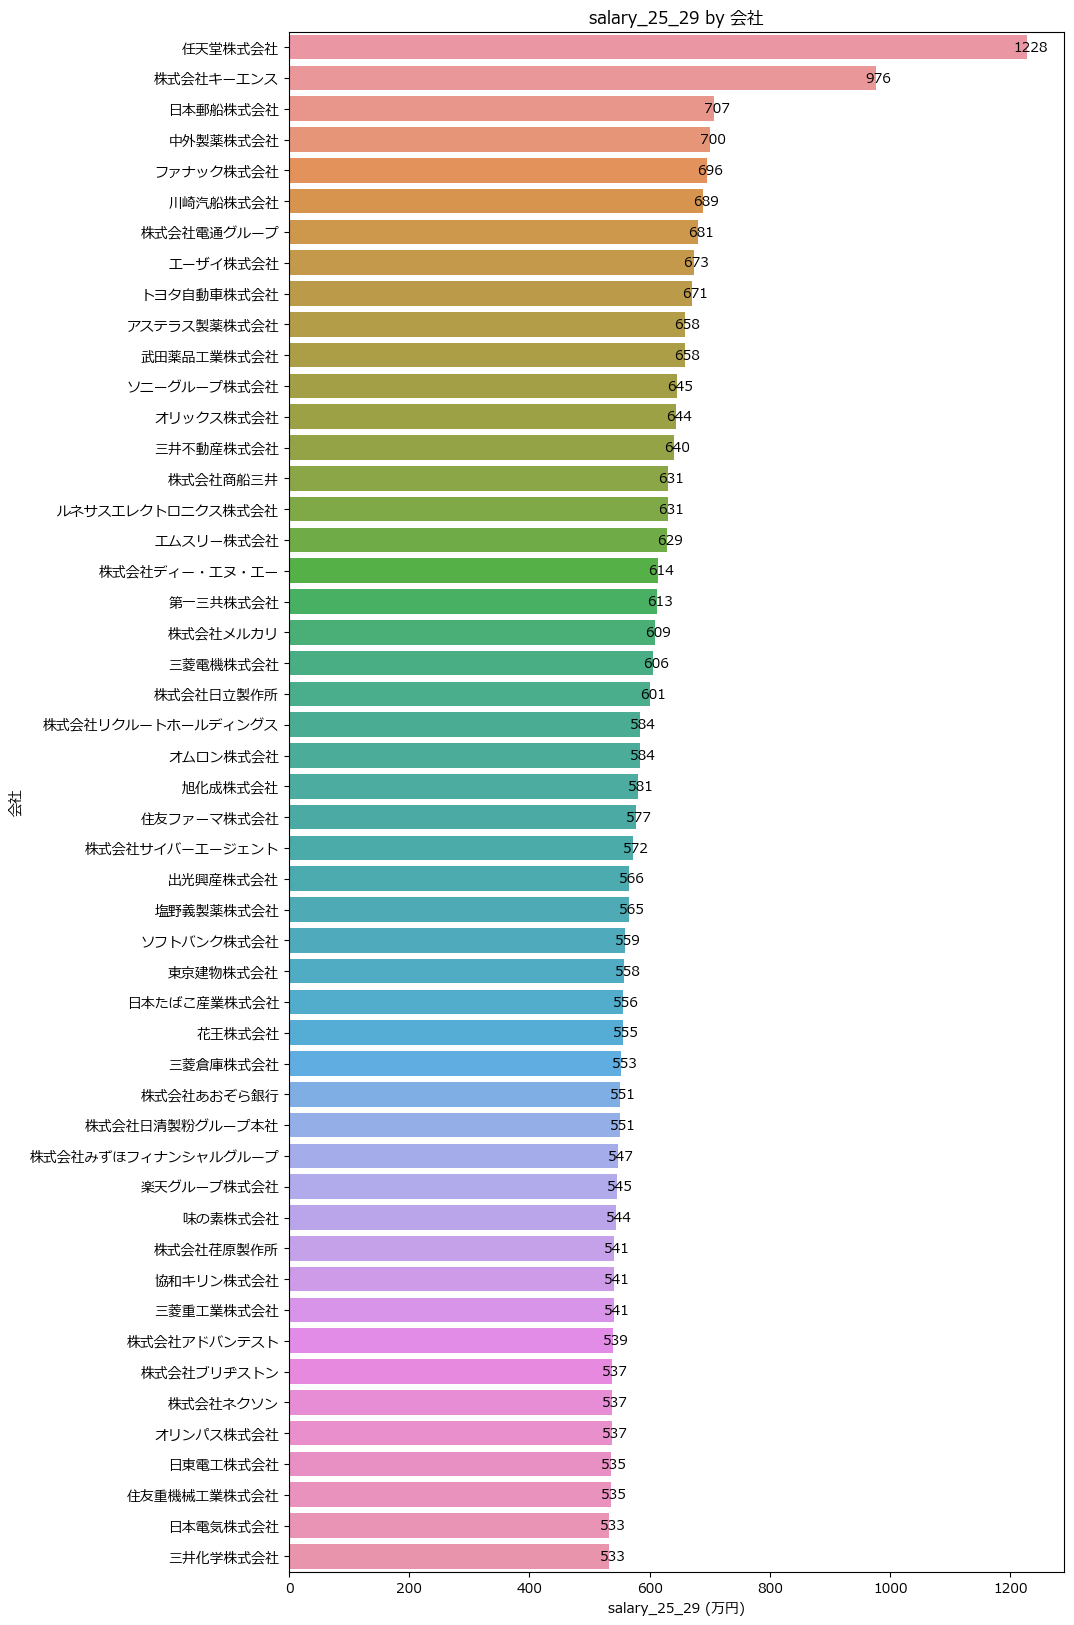

In [37]:
plt.figure(figsize=(10, 20))

# データを 'salary_25_29' 列でソートし、上位100件を取得
sorted_df = df.sort_values('salary_25_29', ascending=False).head(50)

# 水平棒グラフをプロット
barplot = sns.barplot(x='salary_25_29', y='company', data=sorted_df)

plt.title('salary_25_29 by 会社')
plt.xlabel('salary_25_29 (万円)')
plt.ylabel('会社')

# 各バーに値をアノテーションとして追加
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 5,  # アノテーションのx位置
             p.get_y() + p.get_height() / 2,  # アノテーションのy位置
             '{:1.0f}'.format(width),  # アノテーションのテキスト（バーの幅）
             ha='center', va='center')

plt.show()


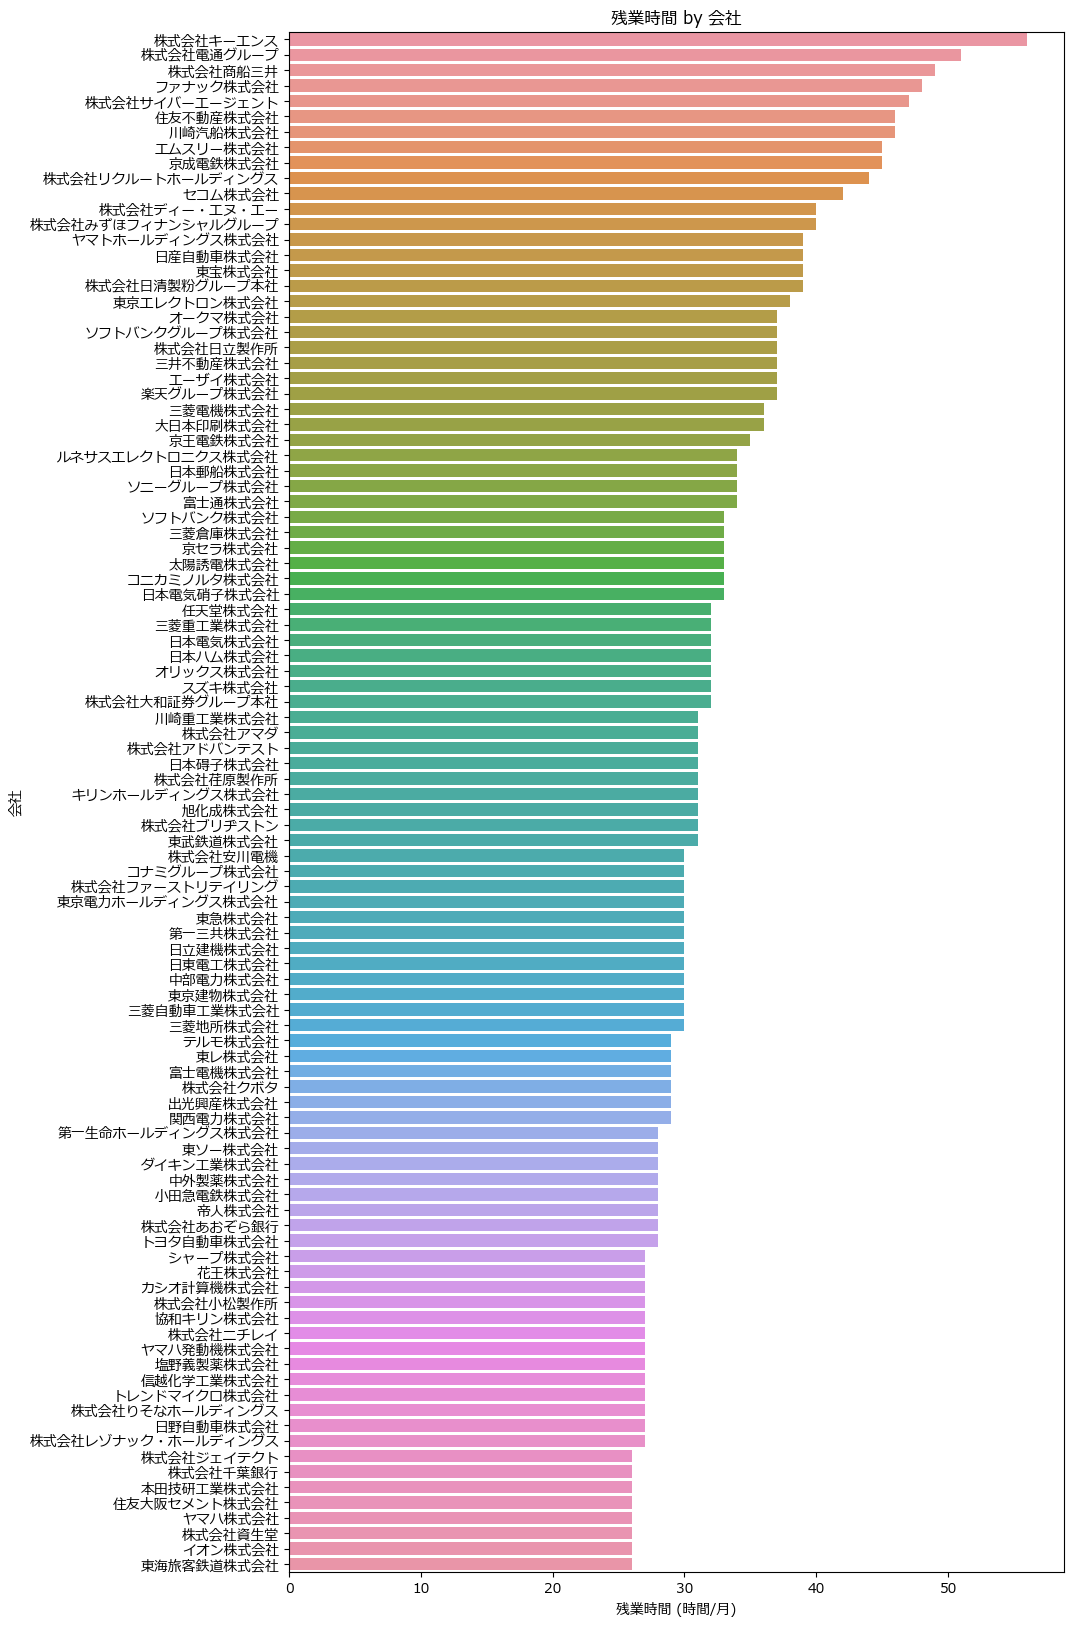

In [32]:
plt.figure(figsize=(10, 20))
sns.barplot(x='overtime', y='company', data=df.sort_values('overtime', ascending=False).head(100))
plt.title('残業時間 by 会社')
plt.xlabel('残業時間 (時間/月)')
plt.ylabel('会社')
plt.show()


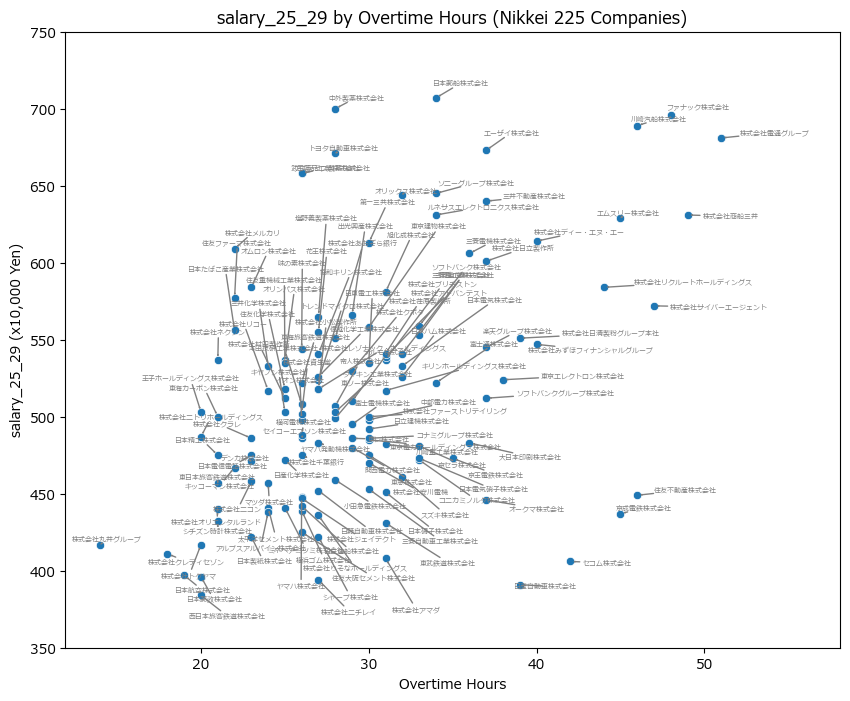

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

plt.figure(figsize=(10, 8))

# 残業時間と給与の関係を散布図で表示
scatter = sns.scatterplot(x='overtime', y='salary_25_29', data=df)

texts = []
for i in range(len(df)):
    # 有限値（finite value）であることを確認し、y軸の範囲内にあるデータのみをアノテーションする
    if pd.notnull(df.overtime.iloc[i]) and pd.notnull(df.salary_25_29.iloc[i]) and 350 <= df.salary_25_29.iloc[i] <= 750:
        text = plt.text(x=df.overtime.iloc[i], y=df.salary_25_29.iloc[i], s=df.company.iloc[i], 
                        fontdict=dict(color='grey',size=5))
        texts.append(text)

plt.title('salary_25_29 by Overtime Hours (Nikkei 225 Companies)')
plt.xlabel('Overtime Hours')
plt.ylabel('salary_25_29 (x10,000 Yen)')
plt.ylim([350, 750])  # y軸の範囲を350万円から750万円に設定

# テキストのオーバーラップを避ける
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


c:\Users\100ca\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


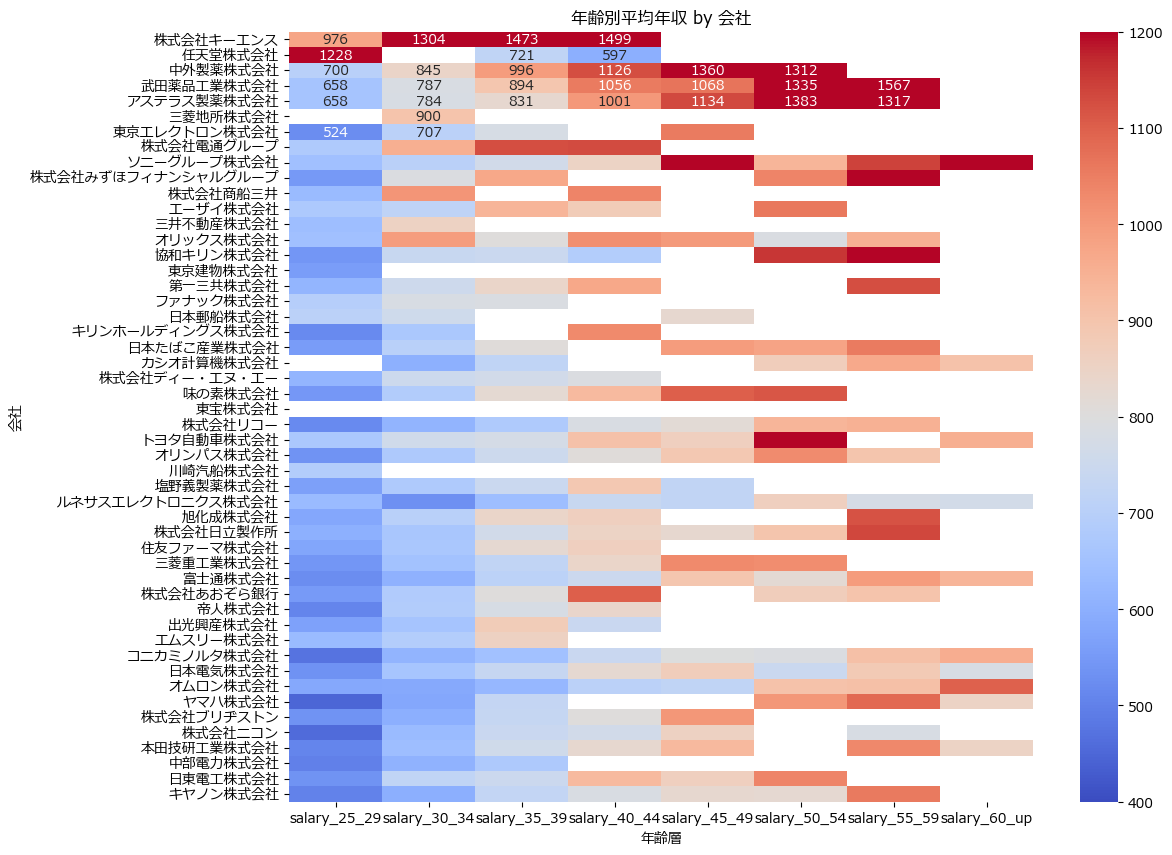

In [34]:
age_salary_df = df[['company', 'salary_25_29', 'salary_30_34', 'salary_35_39', 'salary_40_44', 'salary_45_49', 'salary_50_54', 'salary_55_59', 'salary_60_up']].head(50)

plt.figure(figsize=(12, 10))
sns.heatmap(age_salary_df.set_index('company'), annot=True, fmt=".0f", cmap='coolwarm', vmin=400, vmax=1200)
plt.title('年齢別平均年収 by 会社')
plt.xlabel('年齢層')
plt.ylabel('会社')
plt.show()


In [35]:
df.sort_values(by='salary_25_29',ascending=False).head(50)

,company,salary,overtime,salary_25_29,salary_30_34,salary_35_39,salary_40_44,salary_45_49,salary_50_54,salary_55_59,salary_60_up
96,任天堂株式会社,1074.0,32.0,1228.0,NaN,721.0,597.0,NaN,NaN,NaN,NaN
25,株式会社キーエンス,1205.0,56.0,976.0,1304.0,1473.0,1499.0,NaN,NaN,NaN,NaN
156,日本郵船株式会社,800.0,34.0,707.0,758.0,NaN,NaN,830.0,NaN,NaN,NaN
5,中外製薬株式会社,1060.0,28.0,700.0,845.0,996.0,1126.0,1360.0,1312.0,NaN,NaN
29,ファナック株式会社,813.0,48.0,696.0,783.0,790.0,NaN,NaN,NaN,NaN,NaN
158,川崎汽船株式会社,738.0,46.0,689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,株式会社電通グループ,937.0,51.0,681.0,955.0,1125.0,1130.0,NaN,NaN,NaN,NaN
6,エーザイ株式会社,861.0,37.0,673.0,717.0,940.0,876.0,NaN,1060.0,NaN,NaN
37,トヨタ自動車株式会社,742.0,28.0,671.0,760.0,773.0,909.0,863.0,1266.0,NaN,955.0
1,アステラス製薬株式会社,980.0,26.0,658.0,784.0,831.0,1001.0,1134.0,1383.0,1317.0,NaN


In [36]:
df.describe()

,salary,overtime,salary_25_29,salary_30_34,salary_35_39,salary_40_44,salary_45_49,salary_50_54,salary_55_59,salary_60_up
count,146.000000,146.000000,136.000000,129.000000,121.000000,94.000000,58.000000,47.000000,33.000000,21.000000
mean,652.308219,29.561644,522.625000,621.348837,708.578512,777.329787,841.793103,874.489362,1021.424242,889.523810
std,137.465460,7.257788,103.217852,124.525327,133.906295,157.593419,168.707653,203.240046,179.964238,123.570473
min,345.000000,14.000000,384.000000,420.000000,416.000000,443.000000,525.000000,488.000000,723.000000,693.000000
25%,566.250000,25.000000,460.500000,552.000000,638.000000,691.250000,728.500000,740.500000,910.000000,825.000000
50%,633.500000,28.000000,503.000000,604.000000,705.000000,741.000000,830.500000,834.000000,1010.000000,872.000000
75%,711.500000,32.750000,551.500000,666.000000,764.000000,848.750000,921.750000,992.500000,1119.000000,955.000000
max,1205.000000,56.000000,1228.000000,1304.000000,1473.000000,1499.000000,1360.000000,1383.000000,1567.000000,1224.000000
